### Import necessary libraries

In [349]:
from pytrends.request import TrendReq
pytrends = TrendReq()
import pandas as pd                       
import time
import datetime
from datetime import datetime, date, time
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.style.use('fivethirtyeight')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#B05E55"]) 
import warnings
import itertools
import statsmodels.api as sm

### Due to the nature data and the search engine mechanics, the dataset doesn't not contain any missing values, or inconsistencies that would need to be addressed. 
### The only pre-processing step we need to take is aggregation from daily to monthly indicators. We  achieve that by taking the arithmetic mean and aggregating to monthly index.

In [350]:

kw_list = ["depression"]

pytrends.build_payload(kw_list, cat=0, timeframe='2010-01-01 2020-10-01', geo='GB', gprop='')

# Interest Over Time: returns historical, indexed data for when the keyword was searched most as shown on Google Trends' Interest Over Time section.
trend_daily = pytrends.interest_over_time()
trend_daily = pd.DataFrame(trend_daily)#, index=[0])
trend_daily.drop(columns= 'isPartial', inplace=True)

trend_monthly = trend_daily.resample('M').mean()

print(trend_monthly)


depression
date                  
2010-01-31          59
2010-02-28          59
2010-03-31          64
2010-04-30          57
2010-05-31          58
...                ...
2020-06-30          76
2020-07-31          72
2020-08-31          71
2020-09-30          74
2020-10-31          77

[130 rows x 1 columns]


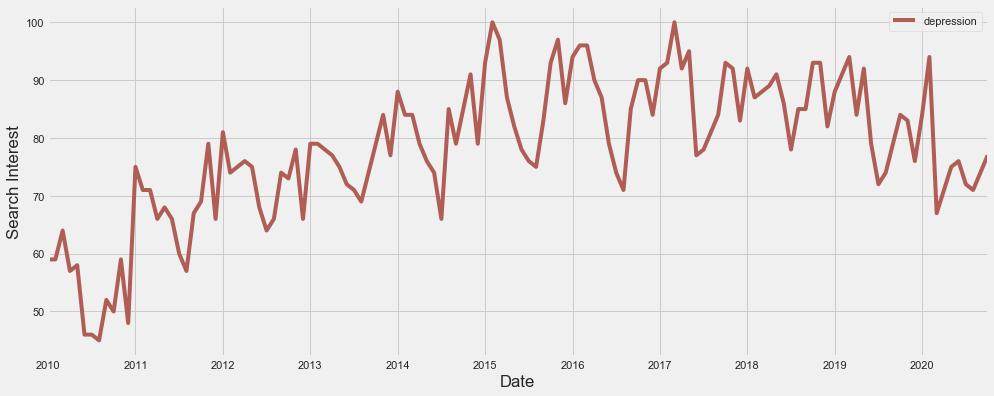

In [351]:
trend_monthly.plot(figsize=(15, 6))
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.show()

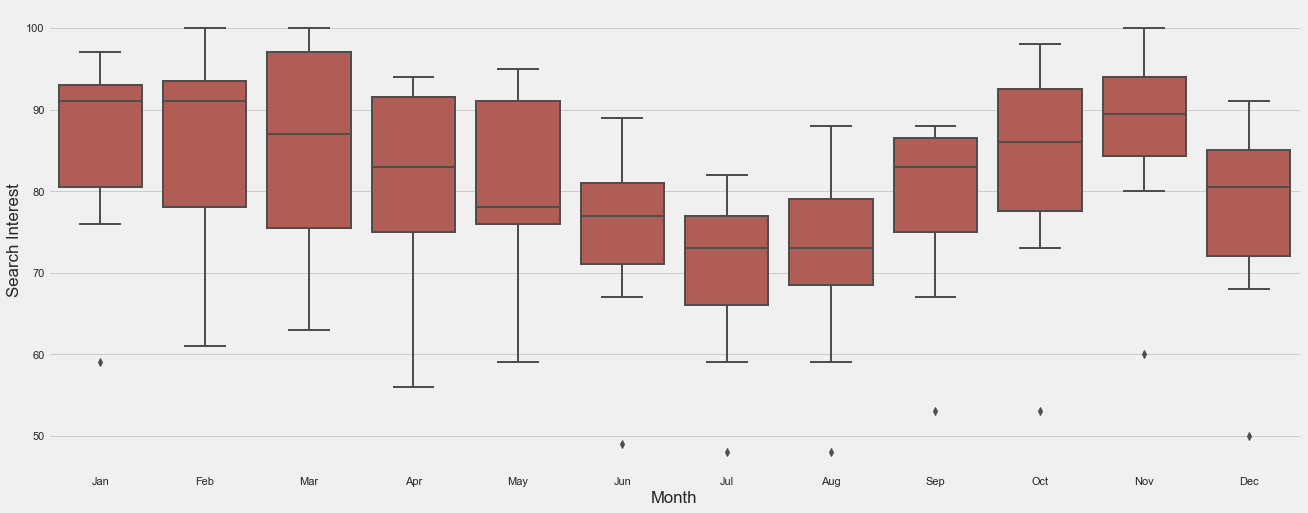

In [352]:
trend_monthly['month'] = boxplot_monthly.index.strftime('%b')
fig, ax = plt.subplots()
fig.set_size_inches((20,8))
sns.cubehelix_palette(as_cmap=True)
sns.boxplot(x='month',y='depression',data=boxplot_monthly,ax=ax, linewidth=2, color="#B05E55", saturation=1)
ax.set(xlabel='Month', ylabel='Search Interest')
plt.show()

### Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, and it seems like annual lows are always reached throughout summer time, rising with the arrival of autumn, falling around Christmas time and peaking out towards New Year or January.

In [ ]:
print(decomposition.seasonal)

### The decomposition plot shows that search of the term 'depression' had a rising trend between 2010 and 2016. Since then, the keyword search has been consistently high in comparison with the past. The seasonal part of decomposition plot clearly confirms the observations mentioned earlier.


In [354]:
# Open and transform weather data as obtained from https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt
weather = pd.read_csv('heathrowdata.csv')
weather.drop(['blank'], inplace=True, axis=1)
weather['mm'] = weather.mm.map("{:02}".format)
weather['date'] = weather['yyyy'].astype(str) + '-' + weather['mm'].astype(str) + '-' + '01'
weather['date'] = pd.to_datetime(weather['date'], format='%Y-%m-%d')
weather = weather.set_index('date')
weather = weather.resample('M').last()
weather['temp'] = (weather['tmax(degC)'] + weather['tmin(degC)']) /2


In [355]:
# Merge the Google Analytics data with temperature dataset
df = weather.merge(seasonal, left_index=True, right_index=True, copy=False, suffixes=('_left', '_right'))#, left_on='date', right_on='date', 
print(df)

yyyy  mm  tmax(degC)  tmin(degC) af(days)  rain(mm) sun(hours)  \
date                                                                         
2010-01-31  2010  01         4.5        -0.3       15      51.8       51.3   
2010-02-28  2010  02         6.9         1.7        8     100.4       46.7   
2010-03-31  2010  03        11.1         3.7        4      39.8      106.4   
2010-04-30  2010  04        15.8         5.6        0      23.2      201.7   
2010-05-31  2010  05        17.3         7.7        0      20.6      170.4   
...          ...  ..         ...         ...      ...       ...        ...   
2020-05-31  2020  05        21.1         9.1        0       2.0      308.6   
2020-06-30  2020  06        22.5        12.6        0      54.0      174.9   
2020-07-31  2020  07        23.8        13.4        0      35.2      171.2   
2020-08-31  2020  08        25.6        15.6        0      58.2      161.8   
2020-09-30  2020  09        21.6        11.2        0      20.0      168.9  

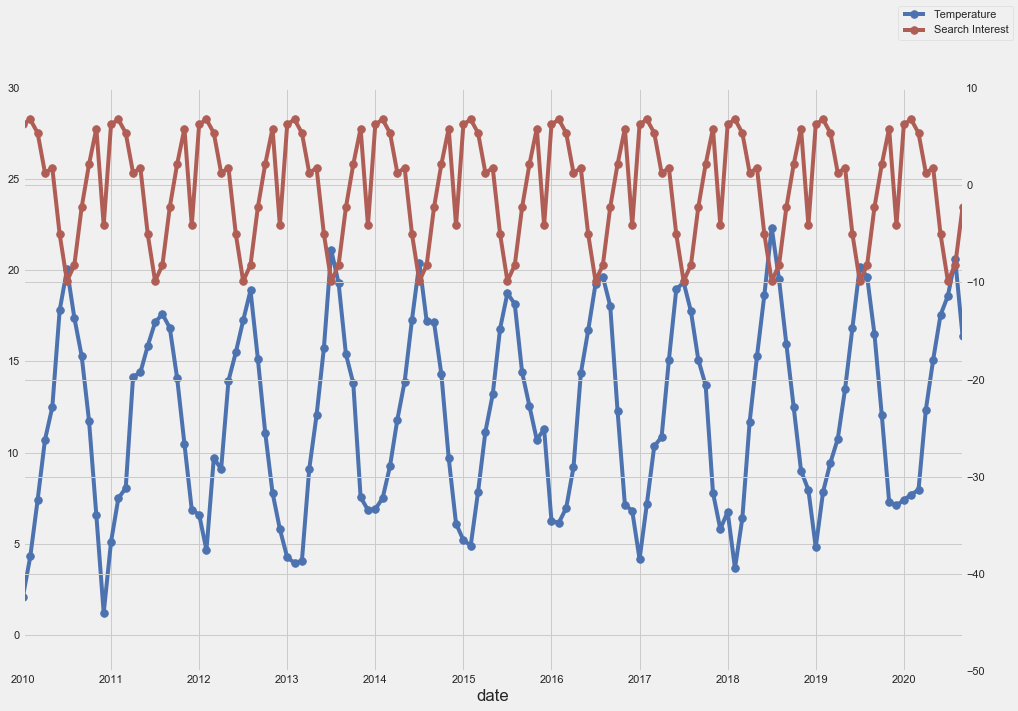

In [356]:
rcParams['figure.figsize'] = 15, 10
ax = df.plot(y="temp", legend=False, color="b", marker=".", markersize=15)
plt.ylim(-2,30)
ax2 = ax.twinx()
df.plot(y="seasonal", ax=ax2, legend=False, marker=".", markersize=15)
ax.figure.legend(['Temperature','Search Interest'])
plt.ylim(-50,10)
# ax.set(xlabel='Date', ylabel='Search Interest')
plt.show()

OLS Regression Results                            
Dep. Variable:               seasonal   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     202.9
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           4.20e-28
Time:                        22:21:36   Log-Likelihood:                -343.12
No. Observations:                 129   AIC:                             690.2
Df Residuals:                     127   BIC:                             696.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2181      0.782     13.065      0.000       8.670      11.766
t

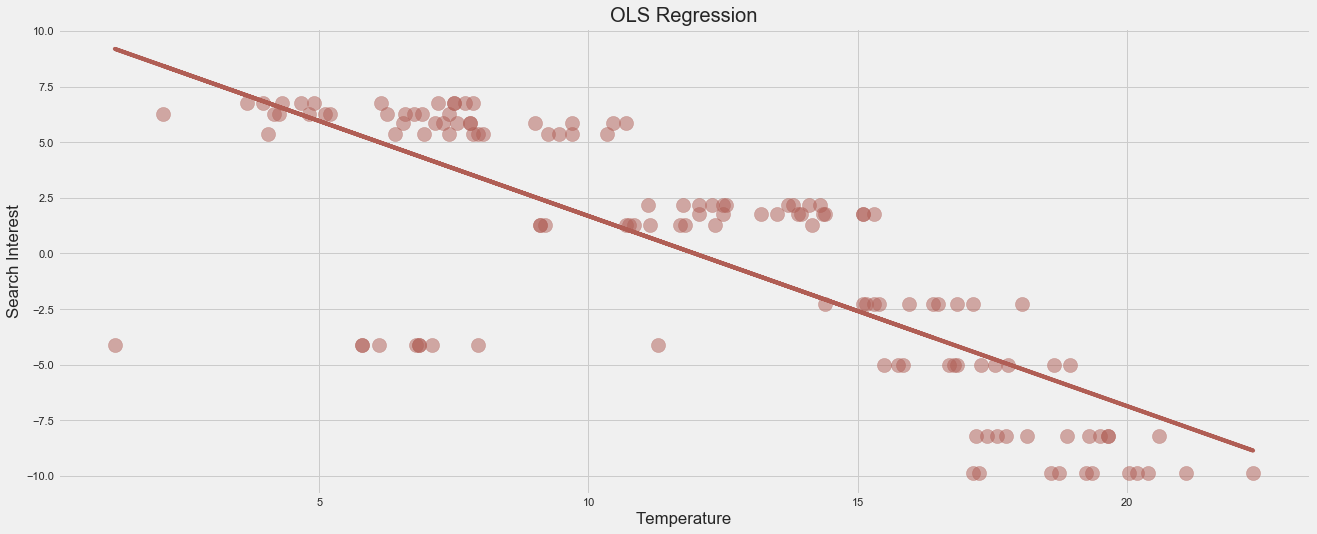

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

interest = df['seasonal'].astype(float)
# sunlight = df['sun(hours)'].astype(float) #tmax(degC)
temp = df['temp'].astype(float) #tmax(degC)
rcParams['figure.figsize'] = 20, 8
# rcParams['lines.color'] = 'r'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#B05E55"]) 

X = sm.add_constant(sunlight)
model = sm.OLS(interest,X)
results = model.fit()
plt.scatter(sunlight,interest,alpha=0.5,  s=200)
y_predict = results.params[0] + results.params[1]*temp
plt.plot(temp,y_predict, linewidth=4)
# plt.xlim(240,350)
# plt.ylim(100,350)
plt.xlabel('Temperature')
plt.ylabel('Search Interest')
plt.title('OLS Regression')
print(results.summary())

### The results and prediction plot show that 61.5% of keyword interest variability can be explained by temperature with a negative impact on the dependent variable at coefficient -0.8538 (Chart 5, Table 2). This suggests that for every increase in temperature by 1 degree Celsius, the normalized interest of keyword “depression” as measured by Google Trends decreases by -0.8538. The p-values of both the constant and independent variables are below 0.000, which confirms the statistical significance of the results. 


In [ ]:
results.summary()

depression
date                  
2010-01-31          59
2010-02-28          59
2010-03-31          64
2010-04-30          57
2010-05-31          58
...                ...
2020-06-30          76
2020-07-31          72
2020-08-31          71
2020-09-30          74
2020-10-31          77

[130 rows x 1 columns]


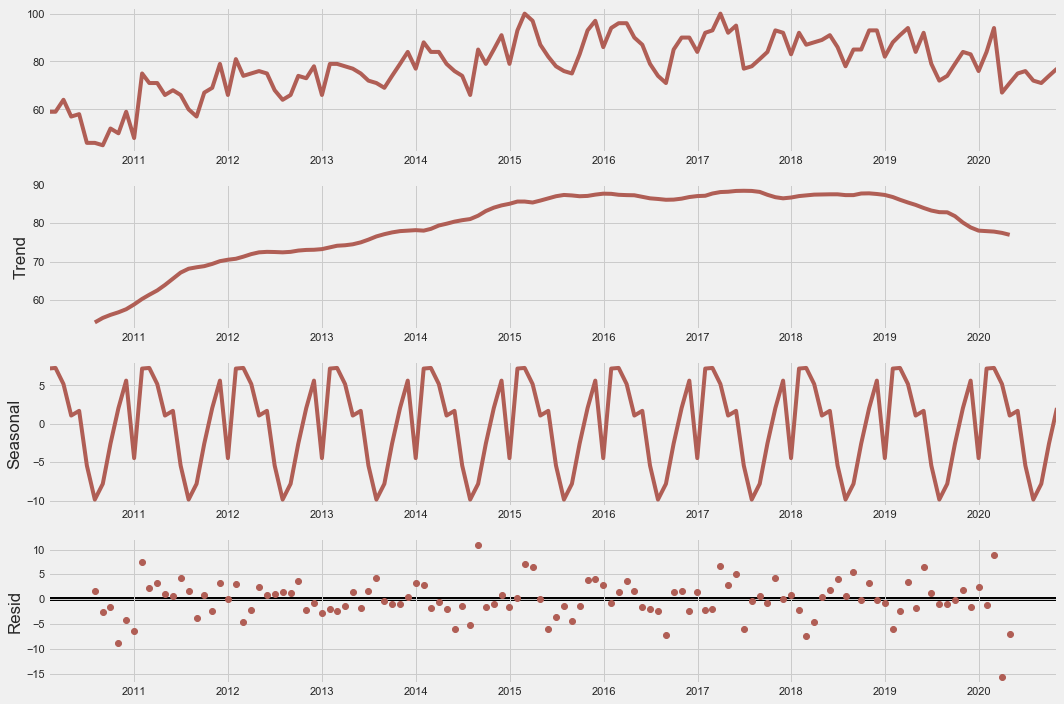

In [353]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
trend_monthly.drop(['month'], axis=1, inplace=True)
print(trend_monthly)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#B05E55"]) 
decomposition = sm.tsa.seasonal_decompose(trend_monthly, model='additive')
fig = decomposition.plot()
plt.show()
